## Document distances and clustering

This notebook was posted by Simon Lindgren // [@simonlindgren](http://www.twitter.com/simonlindgren) // [simonlindgren.com](http://simonlindgren.com)

The following code is about how to calculate and visualise measures of distance and similarity between documents in a [document-term matrix](https://en.wikipedia.org/wiki/Document-term_matrix). I have created [another notebook](https://github.com/simonlindgren/TXT-to-DTM/blob/master/TXT%20to%20DTM.ipynb) about how to create such a matrix from a set of text documents.

When creating this notebook, I drew on the tutorial package [TAToM](https://de.dariah.eu/tatom/), which was written by [Allen Riddell](http://www.twitter.com/ariddell).

### DTM recap
The first block of code below is a quick version of the procedure that I described in the [previous notebook](https://github.com/simonlindgren/TXT-to-DTM/blob/master/TXT%20to%20DTM.ipynb).

In [ ]:
import os, glob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

filenames = []
for f in glob.glob('/Users/simon/AnacondaProjects/data/*txt'):
    filenames.append(f)

# Define custom stop words
stoplist = ["hej", "och"]

vectorizer = CountVectorizer(input='filename', stop_words='english', min_df=1)
dtm = vectorizer.fit_transform(filenames)  # a sparse matrix
vocab = vectorizer.get_feature_names() # a vocaculary list

len(vocab) # check length of the vocabulary 

## Euclidean distances
With the documents converted into [vectors](http://en.wikipedia.org/wiki/Euclidean_vector#History), we can use mathematical notions of similarity and distance between these documents.

Let's calculate [Euclidean distances](https://en.wikipedia.org/wiki/Euclidean_distance) with the helap of the `sklearn` package.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(dtm)

We now have information about distances between documents:

In [ ]:
# document 1 in our dtm
filenames[1]

In [ ]:
# document 3 in our dtm
filenames[3]

In [ ]:
# the distance between these two documents
dist[1, 3]

## Cosine similarities

We can also calculate [cosine similarities](https://en.wikipedia.org/wiki/Cosine_similarity), which helps us get a measure of distance that takes the length of the documents into consideration. This is of course a good idea.

The code for this (below) is very similar to that of Euclidean distance (above). But as cosine similarity is a measure of (yes) _similarity_, it must be flipped in order to be used as a measure of _distance_.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(dtm) # calculate and flip

In [ ]:
dist[1, 3] # try it

### Visualise the distances in 2D
It is possible to get a visual representation of the pairwise distances between documents. This is done by assigning a point in a plane to each text, and then making sure that the distance between these points is proportional to the distances that we calculated. This strategy is called [multidimensional scaling](https://en.wikipedia.org/wiki/Multidimensional_scaling) (MDS). In the code below, we set `n_components` to 2, because we are plotting in a two-dimensional plane. Specifying a [`random_state`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html) makes the plot reproducible.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

# Shorten the document filenames for prettier display
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

# Define the plot
for x, y, name in zip(xs, ys, names):
    plt.scatter(x, y)
    plt.text(x, y, name)


In [ ]:
plt.show()

### Visualise the distances in 3D
Below follows similar code as above, but fitted for 3D visualisation.

In [ ]:
mds = MDS(n_components=3, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2])

for x, y, z, s in zip(pos[:, 0], pos[:, 1], pos[:, 2], names):
    ax.text(x, y, z, s)

plt.show()

### Cluster visualisation
It is often useful in exploratory text analysis to cluster texts into groups of similar texts. We use the distances that we calculated earlier as a starting point for bringing documents with smaller distances between them into the same cluster. There are many clustering methods, but we will use [Ward's method](https://en.wikipedia.org/wiki/Ward%27s_method). This is a strategy for _hierarchical_ clustering, meaning that it merges close clusters and orders them in a clustering tree, or [dendrogram](https://en.wikipedia.org/wiki/Dendrogram).


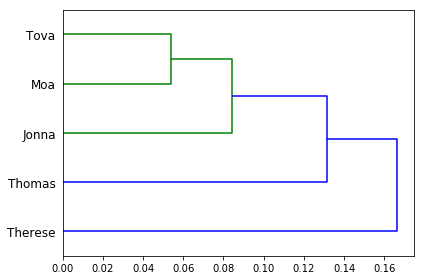

In [53]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist)
dendrogram(linkage_matrix, orientation="right", labels=names)
plt.tight_layout()
plt.show()

